In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
from datetime import datetime
plt.style.use('ggplot')
%matplotlib inline

In [13]:
data = pd.read_csv('NYPD_7_Major_Felony_Incident_Map.csv')
data.head()

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
0,1,f070032d,09/06/1940 07:30:00 PM,Friday,Sep,6,1940,19,9,7,2010,BURGLARY,FELONY,D,66,BROOKLYN,N.Y. POLICE DEPT,987478,166141,"(40.6227027620001, -73.9883732929999)"
1,2,c6245d4d,12/14/1968 12:20:00 AM,Saturday,Dec,14,1968,0,12,14,2008,GRAND LARCENY,FELONY,G,28,MANHATTAN,N.Y. POLICE DEPT,996470,232106,"(40.8037530600001, -73.955861904)"
2,3,716dbc6f,10/30/1970 03:30:00 PM,Friday,Oct,30,1970,15,10,31,2008,BURGLARY,FELONY,H,84,BROOKLYN,N.Y. POLICE DEPT,986508,190249,"(40.688874254, -73.9918594329999)"
3,4,638cd7b7,07/18/1972 11:00:00 PM,Tuesday,Jul,18,1972,23,7,19,2012,GRAND LARCENY OF MOTOR VEHICLE,FELONY,F,73,BROOKLYN,N.Y. POLICE DEPT,1005876,182440,"(40.6674141890001, -73.9220463899999)"
4,5,6e410287,05/21/1987 12:01:00 AM,Thursday,May,21,1987,0,5,28,2009,GRAND LARCENY,FELONY,K,75,BROOKLYN,N.Y. POLICE DEPT,1017958,182266,"(40.6668988440001, -73.878495425)"


In [45]:
brooklyn_slice = data[(data["Occurrence Year"] == 2015) & (data["Borough"] == "BRONX")]
brooklyn_slice = brooklyn_slice[["Occurrence Month", "Occurrence Day", "Identifier"]]
brooklyn_slice = brooklyn_slice[(brooklyn_slice["Occurrence Month"] == "Aug") |
                                (brooklyn_slice["Occurrence Month"] == "Jul") |
                               (brooklyn_slice["Occurrence Month"] == "Jun")]
brooklyn_slice.head()

,Occurrence Month,Occurrence Day,Identifier
730350,Aug,7,4422e3f8
730351,Aug,7,8158857c
730352,Aug,7,da28fa10
730353,Aug,7,1a920563
730678,Aug,7,6a614fd1


In [46]:
df = brooklyn_slice.groupby(["Occurrence Month", "Occurrence Day"]).count()
data_to_check = df["Identifier"].values
data_to_check

array([83, 88, 70, 69, 77, 63, 65, 76, 51, 67, 67, 77, 87, 85, 76, 67, 55,
       65, 73, 78, 73, 73, 82, 64, 76, 60, 53, 76, 61, 70, 81, 64, 49, 67,
       54, 63, 62, 60, 59, 60, 50, 62, 73, 71, 43, 57, 68, 64, 68, 83, 56,
       60, 64, 62, 80, 76, 76, 63, 79, 62, 62, 72, 75, 43, 38, 52, 50, 55,
       48, 60, 58, 49, 40, 68, 66, 45, 48, 46, 66, 49, 59, 68, 60, 60, 64,
       55, 44, 61, 60, 54, 54, 63], dtype=int64)

In [47]:
series = pd.Series(data_to_check)

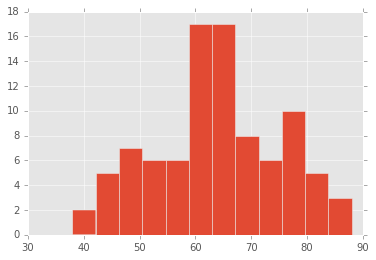

In [49]:
series.hist(bins=12)